# **Deep Learning Project: Street View Housing Number Digit Recognition**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math

import h5py

!pip install keras
import tensorflow as tf
import keras

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Let us check the version of tensorflow.**

In [5]:
print("TensorFlow version is: ", tf.__version__)

TensorFlow version is:  2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [14]:
# Loading the data

# Open the .h5 file in read mode
h5_file=h5py.File('/content/drive/MyDrive/SVHN/SVHN_single_grey1.h5','r')

# List all the objects (datasets and groups) in the .h5 file
objects = list(h5_file.keys())

# Iterate over the objects and print their names and types
for obj in objects:
    if isinstance(h5_file[obj], h5py.Dataset):
        print(f"Dataset: {obj}")
    elif isinstance(h5_file[obj], h5py.Group):
        print(f"Group: {obj}")

# Load the .h5 dataset
X_train = h5_file['X_train']
y_train = h5_file['y_train']
X_test = h5_file['X_test']
y_test = h5_file['y_test']

# Define your model architecture
model = keras.Sequential()

Dataset: X_test
Dataset: X_train
Dataset: X_val
Dataset: y_test
Dataset: y_train
Dataset: y_val


Check the number of images in the training and the testing dataset.

In [15]:
X_train.shape

(42000, 32, 32)

In [86]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [87]:
y_train[0]

2

In [88]:
X_test.shape

(18000, 32, 32)

**Observation:** 

The training data is stored in 3D-h5py Dataset.

*   The training data consists of 42000 images which is represented in the first dimension.
*   The training data has 32*32 pixels (width and height) images which is denoted by other 2 dimensions.

The target variable is 0 to 9.

Test data consists of 18000 images which are of 32*32 pixels.


## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

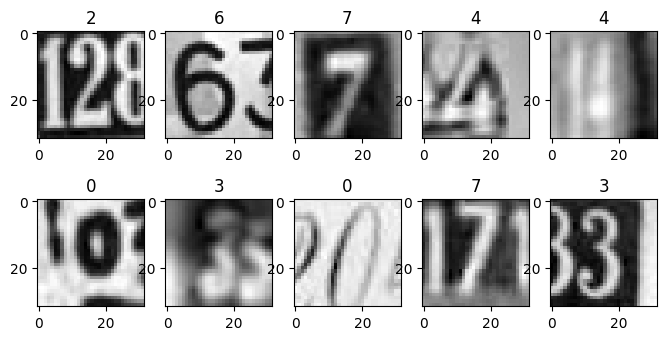

In [89]:
categories=np.unique(y_train)                                                   # Obtaing the unique classes from y_train
rows = 2                                                                        # Defining number of rows=2
cols = 5                                                                        # Defining number of columns=5
fig = plt.figure(figsize=(8, 4))                                                # Defining the figure size to 10x8
current_index=0
for i in range(cols):
    for j in range(rows):
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 2 rows and 5 columns
        ax.imshow(X_train[current_index, :], cmap=plt.get_cmap('gray'))         # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[current_index]])
        current_index += 1
plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [90]:
# Print the shape of the first image in the training dataset
print("The shape of the first image is: ", X_train[0].shape, "\n")

# Print the array of pixels of the first image in the training dataset
X_train[0]

The shape of the first image is:  (32, 32) 



array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

### **Normalize the train and the test data**

Print the shapes of Training and Test data

In [91]:
from tensorflow.keras.utils import normalize

# Normalizing the image pixels
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

print(X_train_normalized.shape)
print(X_test_normalized.shape)

(42000, 32, 32)
(18000, 32, 32)


### **One-hot encode output**

In [92]:
# Creating one-hot encoded representation of target labels
# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("y_train[7] value: '", y_train[7], "' is encoded to: ", y_train_encoded[7])

y_train[7] value: ' 0 ' is encoded to:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**

As the image pixels range from 0 to 255, we are normalizing the data by dividing with 255 and converting them to the range of values between 0-1. 

Note: Here, we used tensorflow keras normalize function which by default does divide the dataset by 255.

One-hot encoding is done based on number of classes we're working with. Here it is 10 classes (as we are trying to classify the images between 0-9). One-hot encoding represents the target variable classification. Each of the 10 neurons here represents the probability of the input image belonging to any of the 10 classes.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [93]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [94]:

def nn_model_1():
  # Intializing a sequential model
  model = Sequential()

  # Flatten the input to add dense convolutional layers on top of it
  model.add(Flatten(input_shape=(32, 32)))

  # Adding a sequential layer with 64 neurons and relu activiation and an input shape = (1024,)
  model.add(Dense(64, activation='relu', input_shape=(1024,)))

  # Adding a sequential layer with 32 neurons and relu activiation
  model.add(Dense(32, activation='relu'))

  # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
  model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  opt = Adam(learning_rate = 0.001)

  # Compile model
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

ann_model = nn_model_1();

# Generating the summary of the model
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


**Observations:**

Flatten Layer: 
The input shape to the layer is (32,32). Number of parameters is 0 here.

Fully Connected Dense Layer: 
Number of neurons = 64
Number of parameters = (1024)(64)+(1)(64) = 65600

Dense Layer 1:
Number of neurons = 32
Number of parameters = (64)(32)+(1)(32) = 2080

Output Layer:
Number of neurons = 10
Number of parameters = (32)(10)+(1)(10) = 330

In [95]:
history = ann_model.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            shuffle=True,
            batch_size=128,
            verbose=1
)

Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.2977 - accuracy: 0.1108 - val_loss: 2.2928 - val_accuracy: 0.1083
Epoch 2/20
263/263 [==============================] - 2s 8ms/step - loss: 2.2119 - accuracy: 0.1842 - val_loss: 2.1229 - val_accuracy: 0.2305
Epoch 3/20
263/263 [==============================] - 2s 8ms/step - loss: 1.9894 - accuracy: 0.3023 - val_loss: 1.8657 - val_accuracy: 0.3504
Epoch 4/20
263/263 [==============================] - 2s 7ms/step - loss: 1.7565 - accuracy: 0.4028 - val_loss: 1.6851 - val_accuracy: 0.4336
Epoch 5/20
263/263 [==============================] - 1s 6ms/step - loss: 1.6162 - accuracy: 0.4586 - val_loss: 1.5600 - val_accuracy: 0.4804
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.5246 - accuracy: 0.4886 - val_loss: 1.4922 - val_accuracy: 0.5069
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4646 - accuracy: 0.5117 - val_loss: 1.4552 - val_accuracy: 0.5118
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

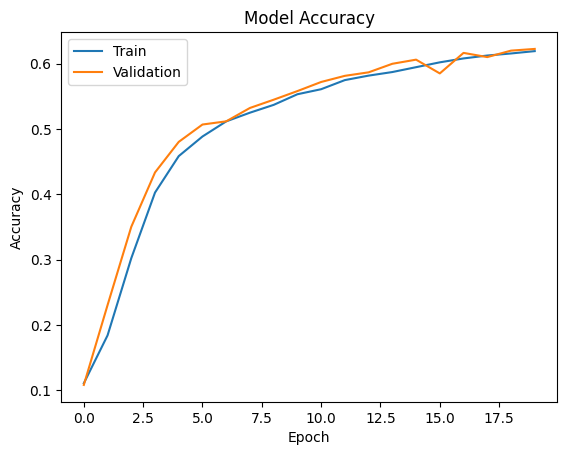

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

The model has performed ok on the training and validation data, with a validation accuracy of 62%.

In [97]:
accuracy = ann_model.evaluate(X_test_normalized, y_test_encoded, verbose=1)

563/563 [==============================] - 1s 2ms/step - loss: 1.1885 - accuracy: 0.6211


In [98]:
# Here we would get the output as probablities for each category
y_pred=ann_model.predict(X_test_normalized)

563/563 [==============================] - 2s 4ms/step


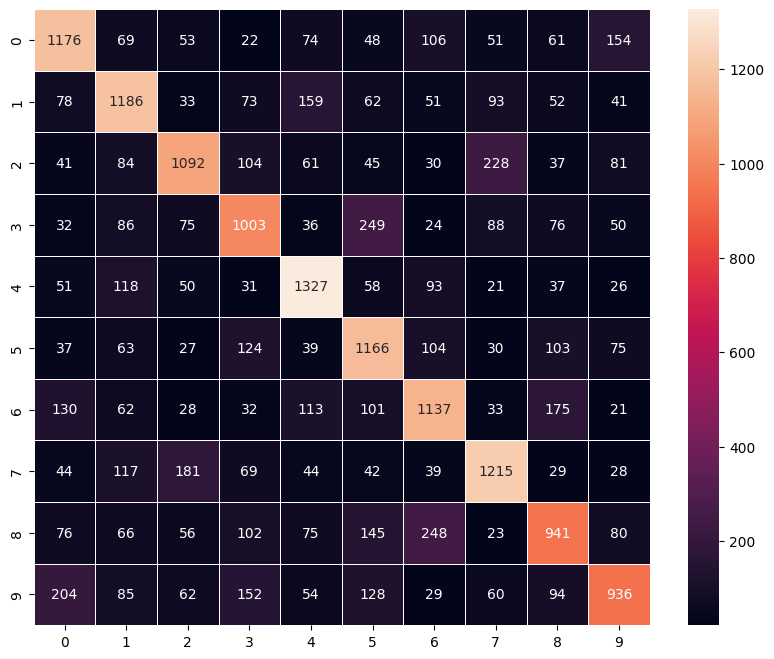

In [99]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observations:_______** 

We observe that although most of the digits are classified correctly, there's a lot of misclassification in the model especially with digits 9, 3, 8, 2 which are confused to 0, 5, 6, 7 respectively.

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [100]:
# Clear previous model's history
keras.backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [101]:
def nn_model_2():
  # Intializing a sequential model
  model = Sequential()

  # Flatten the input to add dense convolutional layers on top of it
  model.add(Flatten(input_shape=(32, 32)))

  # Layer 1. Adding a sequential layer with 256 neurons with relu activation and input shape = (1024,)
  model.add(Dense(256, activation='relu', input_shape=(1024,)))

  # Layer 2. Adding a sequential layer with 128 neurons with relu activation
  model.add(Dense(128, activation='relu'))

  # Add the Dropout layer with rate 0.2
  model.add(Dropout(0.2))

  # Layer 3. Adding a sequential layer with 64 neurons with relu activation
  model.add(Dense(64, activation='relu'))

  # Layer 4. Adding a sequential layer with 64 neurons with relu activation
  model.add(Dense(64, activation='relu'))

  # Layer 5. Adding a sequential layer with 32 neurons with relu activation
  model.add(Dense(32, activation='relu'))

  # Add the BatchNormalization layer
  model.add(BatchNormalization())

  # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
  model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  opt = Adam(learning_rate=0.0005)

  # Compile model
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

ann_model_2 = nn_model_2()

# Generating the summary of the model
ann_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [102]:
history = ann_model_2.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size=128,
            verbose=1
)

Epoch 1/30
263/263 [==============================] - 7s 20ms/step - loss: 2.2895 - accuracy: 0.1239 - val_loss: 2.2526 - val_accuracy: 0.1651
Epoch 2/30
263/263 [==============================] - 4s 14ms/step - loss: 1.9299 - accuracy: 0.2935 - val_loss: 1.7905 - val_accuracy: 0.3663
Epoch 3/30
263/263 [==============================] - 4s 15ms/step - loss: 1.5749 - accuracy: 0.4549 - val_loss: 1.4337 - val_accuracy: 0.5200
Epoch 4/30
263/263 [==============================] - 3s 12ms/step - loss: 1.3932 - accuracy: 0.5284 - val_loss: 1.2689 - val_accuracy: 0.5833
Epoch 5/30
263/263 [==============================] - 4s 17ms/step - loss: 1.2805 - accuracy: 0.5757 - val_loss: 1.1972 - val_accuracy: 0.6130
Epoch 6/30
263/263 [==============================] - 4s 17ms/step - loss: 1.2129 - accuracy: 0.6033 - val_loss: 1.0661 - val_accuracy: 0.6607
Epoch 7/30
263/263 [==============================] - 3s 12ms/step - loss: 1.1441 - accuracy: 0.6305 - val_loss: 1.0398 - val_accuracy: 0.6677

### **Plot the Training and Validation Accuracies and write down your Observations.**

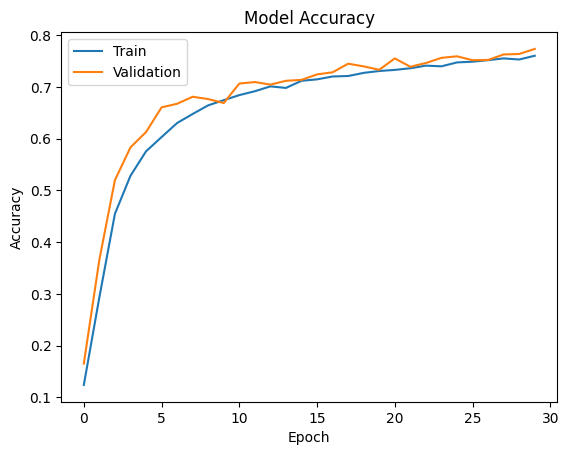

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** The model has performed well on the training and validation data, with a validation accuracy of 77%. We added more layers and increased the epochs to test the accuracy and it has definitely improved when compared to previous model.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [104]:
accuracy2 = ann_model_2.evaluate(X_test_normalized, y_test_encoded, verbose=1)

563/563 [==============================] - 2s 3ms/step - loss: 0.7386 - accuracy: 0.7687


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [105]:
# Here we would get the output as probablities for each category
y_pred2=ann_model_2.predict(X_test_normalized)

563/563 [==============================] - 2s 3ms/step


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

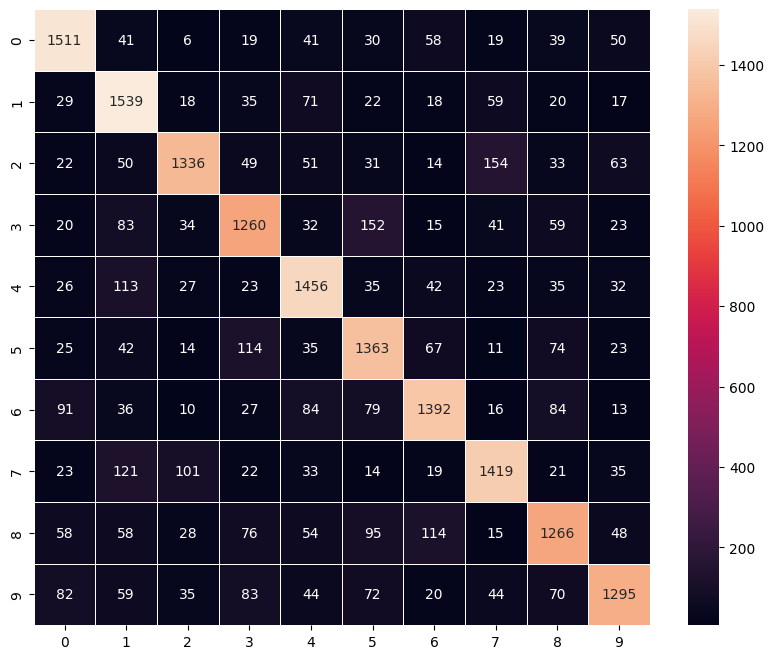

In [106]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred2_arg=np.argmax(y_pred2,axis=1)
y_test2_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test2_arg,y_pred2_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Final Observations:**

As we can see, the second model has predicted most of the classes correctly. There is an improvement in the classification of digits 9,3,8,2 when compared to the first model. By adding additional layers to the model, the accuracy has went up from 62% to 77% 

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [16]:
# Loading the data

# Open the .h5 file in read mode
h5_file=h5py.File('/content/drive/MyDrive/SVHN/SVHN_single_grey1.h5','r')

# Load the .h5 dataset
X_train = h5_file['X_train']
y_train = h5_file['y_train']
X_test = h5_file['X_test']
y_test = h5_file['y_test']

Check the number of images in the training and the testing dataset.

In [18]:
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

Training data shape:  (42000, 32, 32)
Testing data shape:  (18000, 32, 32)


**Observation:**

Training data has 42000 images with image pixel size of (32,32)
Testing data has 18000 images with image pixel size of (32,32)

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [9]:
# Clearing backend
from tensorflow.keras import backend
import numpy as np

backend.clear_session()

In [10]:
import numpy as np

# Print the shape and pixel array of the first image in the training dataset
print("Shape of the first image in the training dataset:", X_train[0].shape)
print("Pixel array of the first image in the training dataset:")
print(X_train[0])

Shape of the first image in the training dataset: (32, 32)
Pixel array of the first image in the training dataset:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [11]:
# Convert the train and test datasets to NumPy arrays
X_train_array = X_train[:]
X_test_array = X_test[:]

# Reshape the train and test datasets to 4D arrays
X_train_4d = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], X_train_array.shape[2], 1)
X_test_4d = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], X_test_array.shape[2], 1)

Normalize inputs from 0-255 to 0-1

In [12]:
# Normalize the training dataset
X_train_normalized = X_train_4d / 255.0

# Normalize the test dataset
X_test_normalized = X_test_4d / 255.0

Print New shape of Training and Test

In [13]:
# Print the new shapes of the train and test datasets
print("New shape of the train dataset:", X_train_normalized[0].shape)
print("New shape of the test dataset:", X_test_normalized[0].shape)

New shape of the train dataset: (32, 32, 1)
New shape of the test dataset: (32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [14]:
from tensorflow.keras.utils import to_categorical

# Perform one-hot encoding on the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

**Observation:**

The training data shape is (32,32,1) after normalization
The test data shape is (32,32,1) after normalization


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [16]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [134]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def cnn_model_1():
  # Define the CNN model
  model = Sequential()

  # First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
  model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))

  # Another LeakyRelu with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # A max-pooling layer with a pool size of 2x2
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Flatten the output from the previous layer
  model.add(Flatten())

  # Add a dense layer with 32 nodes
  model.add(Dense(32))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model.add(LeakyReLU(0.1))

  # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  model.add(Dense(10, activation='softmax'))

  # Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

cnn_model = cnn_model_1()

# Print the model summary
cnn_model.summary()

# Fit the model on the training data
history = cnn_model.fit(X_train_normalized, y_train_encoded, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

**Observation:**

The above CNN model has the following layers:

**First convolutional layer:**
The input shape: (32,32,1)
Number of filters = 16
Size of filter = (3)(3)
Number of parameters = ((3)(3)(1)+1)(16)=160
(width of filter in current layer x height of filter in current layer x number of filters in previous layer + bias) x number of filters in current layer

**LeakyRelu Layer:**
Slope = 0.1
LeakyRelu has no trainable parameters, so number of parameters = 0

**Maxpooling Layer:**
Pooling has no trainable parameters, so number of parameters = 0

**Flatten:**
It has no trainable parameters, so number of parameters = 0

**Fully Connected Dense Layer:**
Number of filters = 32
Number of parameters = (32)(8192)+(1)(32)=262,176

**Output Layer:**
Number of filters = 10
Number of parameters = (32)(10)+(1)(10)=330

### **Plot the Training and Validation Accuracies and Write your observations.**

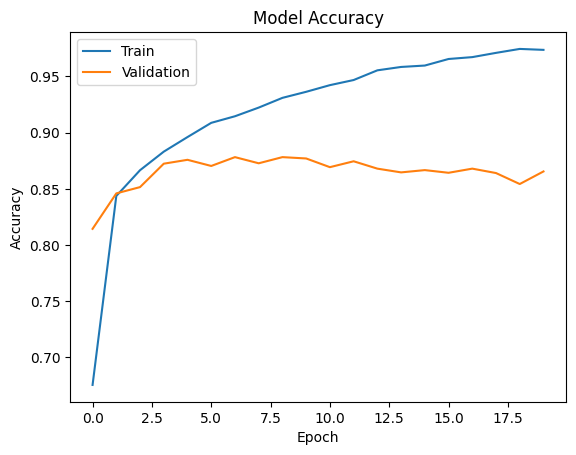

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

The model has performed well on training and validation data, with a validation accuracy of 86%




Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [15]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [17]:
def cnn_model_2():
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, 'same' padding, and input shape (32, 32, 1)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional layer with 32 filters, kernel size 3x3, 'same' padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Max Pooling layer with pool size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch Normalization layer
    model.add(BatchNormalization())

    # Third Convolutional layer with 32 filters, kernel size 3x3, 'same' padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Fourth Convolutional layer with 64 filters, kernel size 3x3, 'same' padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Max Pooling layer with pool size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch Normalization layer
    model.add(BatchNormalization())

    # Flatten the output from the previous layer
    model.add(Flatten())

    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    # Dropout layer with rate 0.5
    model.add(Dropout(0.5))

    # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    model.add(Dense(10, activation='softmax'))

    # Compile the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'.
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Create the model using cnn_model_2 function
cnn_model_2 = cnn_model_2()

# Print the summary of the model
cnn_model_2.summary()

# Fit the model on the train data
history = cnn_model_2.fit(X_train_normalized, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

### **Plot the Training and Validation accuracies and write your observations.**

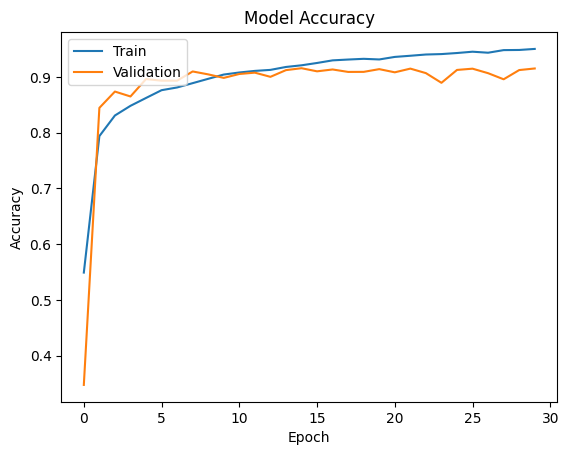

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

The model has performed even better on the training and validation data, with a validation accuracy of 91%. By adding more dense layers and batch normalizattion layers, the accuracy has definitely improved from 1st CNN model to 2nd. Increasing the number of epochs may cause us to overfit the model to the training data which can be seen as the validation accuracy became flat.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [19]:
cnn_model_2_accuracy = cnn_model_2.evaluate(X_test_normalized, y_test_encoded, verbose=1)

563/563 [==============================] - 21s 38ms/step - loss: 0.4645 - accuracy: 0.9131


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

563/563 [==============================] - 21s 38ms/step


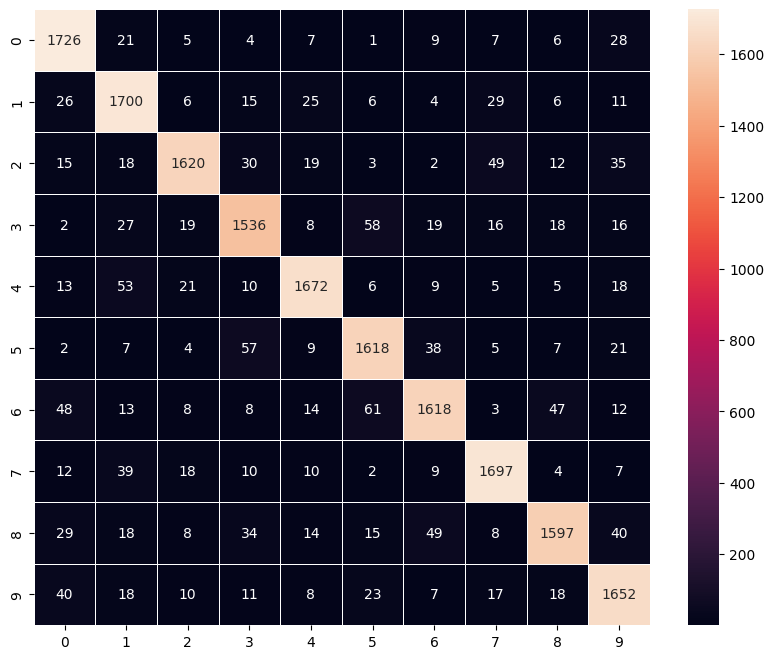

In [20]:
cnn_model_2_pred = cnn_model_2.predict(X_test_normalized)

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_cnn_2_arg=np.argmax(cnn_model_2_pred,axis=1)
y_test_cnn_2_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_cnn_2_arg,y_pred_cnn_2_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observations:**

Most of the classes are predicted correctly. Although there are still misclassifications in the digits 6, 4, 3, 2, 8 which are confused with digits 0,1, 5, 7, 6 respectively.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

The second CNN model has definitely performed well on test data. It reached an accuracy of 91% on training data and validation data as well as the test data. This indicates that there's a clear increase of classification accuracy as we can see in the confusion matrix above. 

We can clearly see that accuracy went way higher with CNN model when compared to ANN model. 

However, the increase in accuracy came at the cost of computation and model building time. As each epoch took on average of
2-3s for 1st ANN model
4-5s for 2nd ANN model
90-100s for 1st CNN model
150-160s for 2nd CNN model

This comutational time will increase further more for larger datasets. 
